Esercizio 1.1
---

Oltre al consumo nel dataset **OPSD_Germany_all** sono riportati anche produzione di energia solare e eolica.

**1.** Cariare il dataframe usando *Date* come time index. La produzione solare non è presente fino al 31-12-2011; Selezionate solo le date successive.

**2.** Creare una colonna *Renewable* come somma di eolico e solare.

**3.** Calcolare il rapporto tra **a)** Il totale della produzione di rinnovabili a settembre 2014 e **b)** il totale del consumo elettrico nello stesso mese

**4.** Usando le proprietà dell'indice (**hint**: *index.day_name()*), create la colonna 'Weekday' contenente il giorno della settimana.

**5.** Creare il dataframe *df_sunday_wind* contenente solo la produzione eolica di domenica

**6.** Calcolare la produzione media eolica di domenica tra gennaio e marzo 2017 (inclusi)

---

In [8]:
import pandas as pd

**1.** Cariare il dataframe usando *Date* come time index. La produzione solare non è presente fino al 31-12-2011; Selezionate solo le date successive.

In [9]:
df = pd.read_csv('data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')
df = df.loc['2012':,:]
df.head()

,Consumption,Wind,Solar
Date,,,
2012-01-01,948.128,227.465,6.587
2012-01-02,1269.581,207.327,6.574
2012-01-03,1334.745,473.468,24.679
2012-01-04,1347.136,499.804,14.681
2012-01-05,1376.658,523.851,5.071


**2.** Creare una colonna *Renewable* come somma di eolico e solare.

In [16]:
df.Weekday = df.index.day_name(locale = 'it')
df.Weekday

Index(['Domenica', 'Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì',
       'Sabato', 'Domenica', 'Lunedì', 'Martedì',
       ...
       'Venerdì', 'Sabato', 'Domenica', 'Lunedì', 'Martedì', 'Mercoledì',
       'Giovedì', 'Venerdì', 'Sabato', 'Domenica'],
      dtype='object', name='Date', length=2192)

**5.** Creare il dataframe *df_sunday_wind* contenente solo la produzione eolica di domenica

In [17]:
df_sunday_wind = pd.DataFrame(data=df.loc[df.Weekday=="Domenica",'Wind'], columns=["Wind"])
df_sunday_wind.head()

,Wind
Date,
2012-01-01,227.465
2012-01-08,220.851
2012-01-15,34.468
2012-01-22,418.173
2012-01-29,78.807


**6.** Calcolare la produzione media eolica di domenica tra gennaio e marzo 2017 (inclusi)

In [18]:
df_sunday_wind.loc['2017-01':'2017-03','Wind'].mean()

276.9626153846154

___

Esercizio 1.2
---

Plottare il consumo energetico.

Che tipo di stagionalità si può osservare?

In [19]:
import matplotlib.pyplot as plt

df = pd.read_csv('data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


In [20]:
import seaborn as sns

sns.set()

<AxesSubplot:title={'center':'Solar energy production (GWh)'}, xlabel='Date'>

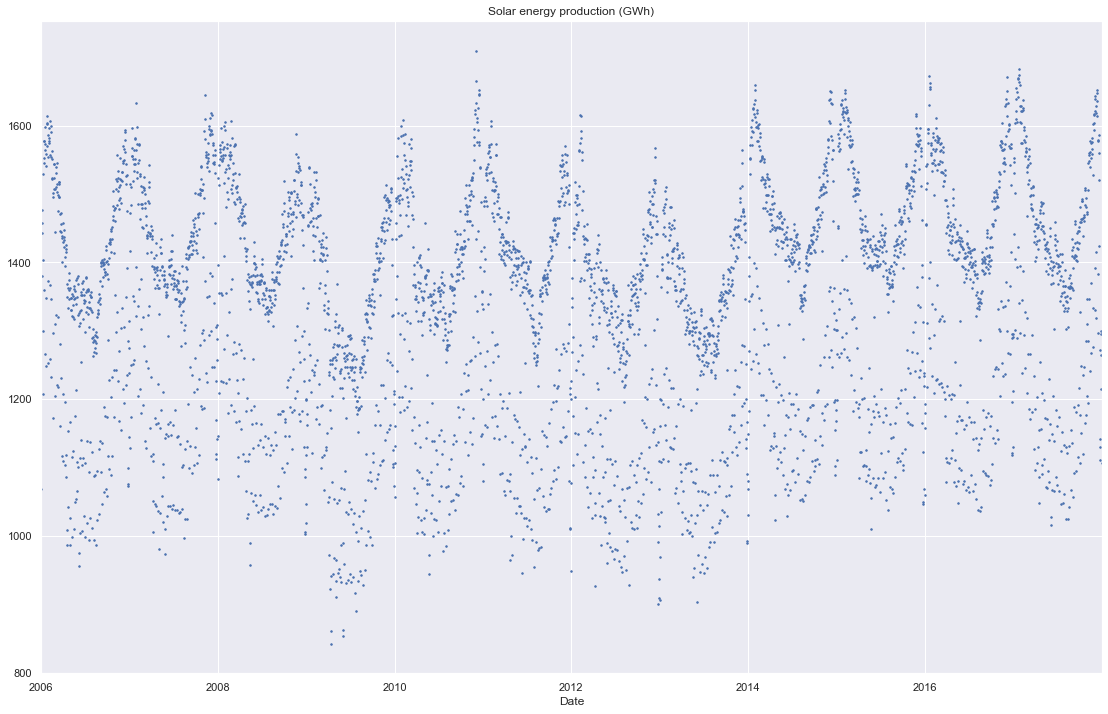

In [21]:
df.loc[:,"Consumption"].plot(figsize=(19, 12),
              title='Solar energy production (GWh)',
              marker='.',
              markersize=3,
              linestyle='')

<AxesSubplot:title={'center':'Solar energy production (GWh)'}, xlabel='Date'>

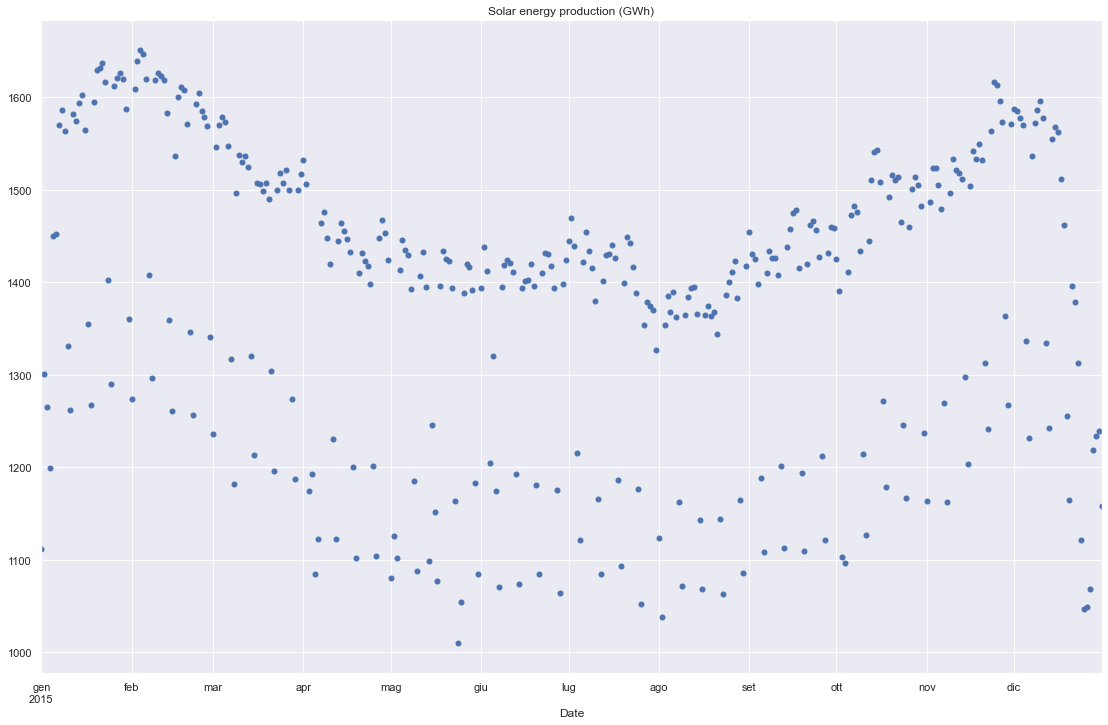

In [22]:
df.loc["2015","Consumption"].plot(figsize=(19, 12),
              title='Solar energy production (GWh)',
              marker='.',
              markersize=10,
              linestyle='')

___
Esercizio 1.3
---

1) Analizzare la stagionalità settimanale del consumo di energia elettrica tramite groupby e boxplot
2) Analizzare il comportamento giornaliero del mese di dicembre
3) Analizzare il trend di crescita annuo di consumo, produzione solare e produzione eolica
4) Plottare all'interno dello stesso plot le 7 linee di consumo giornaliero


1) Analizzare la stagionalità settimanale del consumo di energia elettrica tramite groupby e boxplot

In [23]:
df['day_of_week'] = df.index.day_name()

df.head()

,Consumption,Wind,Solar,day_of_week
Date,,,,
2006-01-01,1069.184,NaN,NaN,Sunday
2006-01-02,1380.521,NaN,NaN,Monday
2006-01-03,1442.533,NaN,NaN,Tuesday
2006-01-04,1457.217,NaN,NaN,Wednesday
2006-01-05,1477.131,NaN,NaN,Thursday


In [24]:
df.groupby('day_of_week', sort=False).mean()

,Consumption,Wind,Solar
day_of_week,,,
Sunday,1103.104493,172.033400,88.663385
Monday,1389.786334,160.987213,90.131751
Tuesday,1428.277624,160.016420,88.045792
Wednesday,1433.606541,165.460048,89.263153
Thursday,1421.158254,165.235141,91.149128
Friday,1394.624076,160.754522,89.571278
Saturday,1200.549839,169.197474,87.976280


In [25]:
df.groupby('day_of_week', sort=False)['Consumption'].mean()

day_of_week
Sunday       1103.104493
Monday       1389.786334
Tuesday      1428.277624
Wednesday    1433.606541
Thursday     1421.158254
Friday       1394.624076
Saturday     1200.549839
Name: Consumption, dtype: float64

<AxesSubplot:title={'center':'Average daily solar energy production (GWh)'}, xlabel='day_of_week'>

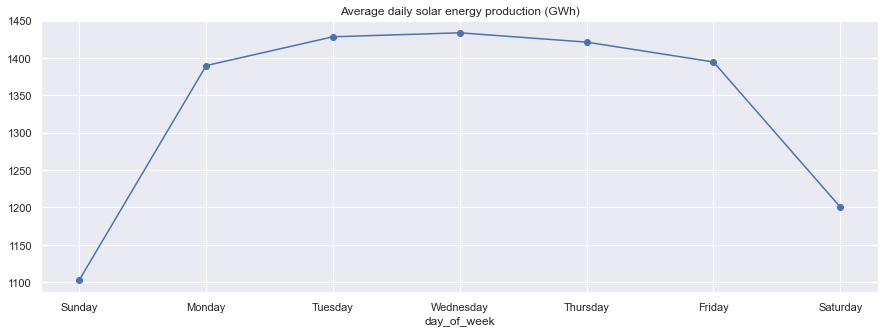

In [26]:
df.groupby('day_of_week', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average daily solar energy production (GWh)')

<AxesSubplot:xlabel='day_of_week', ylabel='Consumption'>

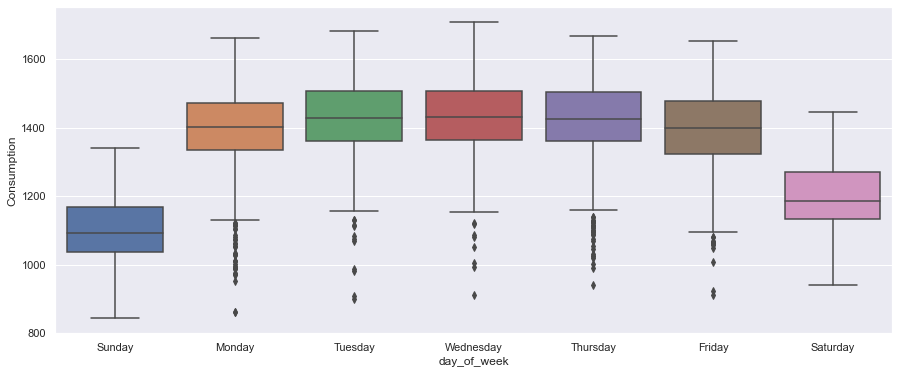

In [27]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='day_of_week', y='Consumption')

2) Analizzare il comportamento giornaliero del mese di dicembre

In [28]:
df["Day"] = df.index.day

df.head()

,Consumption,Wind,Solar,day_of_week,Day
Date,,,,,
2006-01-01,1069.184,NaN,NaN,Sunday,1
2006-01-02,1380.521,NaN,NaN,Monday,2
2006-01-03,1442.533,NaN,NaN,Tuesday,3
2006-01-04,1457.217,NaN,NaN,Wednesday,4
2006-01-05,1477.131,NaN,NaN,Thursday,5


In [29]:
df["Month"] = df.index.month_name()

df.head()


,Consumption,Wind,Solar,day_of_week,Day,Month
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,Sunday,1,January
2006-01-02,1380.521,NaN,NaN,Monday,2,January
2006-01-03,1442.533,NaN,NaN,Tuesday,3,January
2006-01-04,1457.217,NaN,NaN,Wednesday,4,January
2006-01-05,1477.131,NaN,NaN,Thursday,5,January


<AxesSubplot:title={'center':'Average daily consumption (GWh) in December'}, xlabel='Day'>

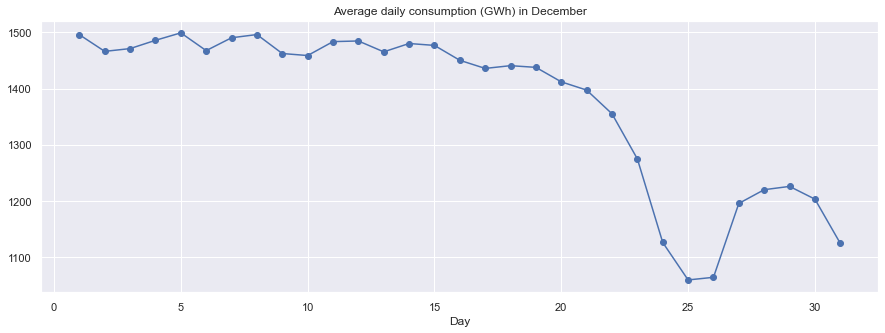

In [37]:
df.loc[df["Month"] == "December"].groupby("Day", sort=False)["Consumption"].mean().plot(
    figsize=(15, 5), marker="o", title="Average daily consumption (GWh) in December"
)


<AxesSubplot:xlabel='Day', ylabel='Consumption'>

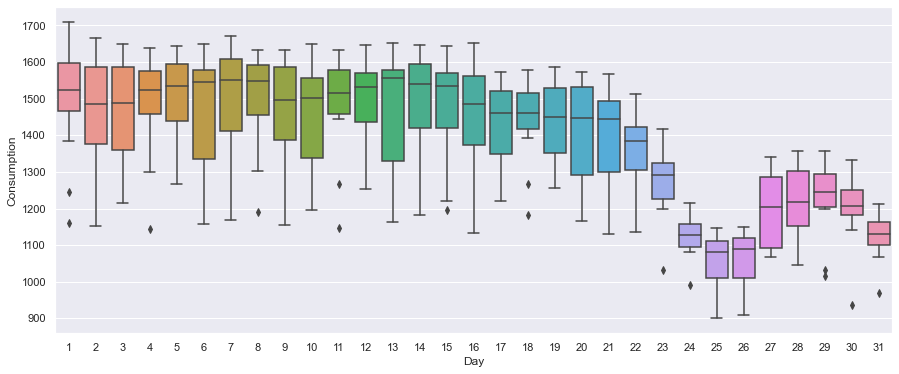

In [38]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.loc[df["Month"] == "December"], x='Day', y='Consumption')

3) Analizzare il trend di crescita annuo di consumo, produzione solare e produzione eolica

In [39]:
df["Year"] = df.index.year

df.head()

,Consumption,Wind,Solar,day_of_week,Day,Month,Year
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,Sunday,1,January,2006
2006-01-02,1380.521,NaN,NaN,Monday,2,January,2006
2006-01-03,1442.533,NaN,NaN,Tuesday,3,January,2006
2006-01-04,1457.217,NaN,NaN,Wednesday,4,January,2006
2006-01-05,1477.131,NaN,NaN,Thursday,5,January,2006


<AxesSubplot:title={'center':'Average daily consumption (GWh) in December'}, xlabel='Year'>

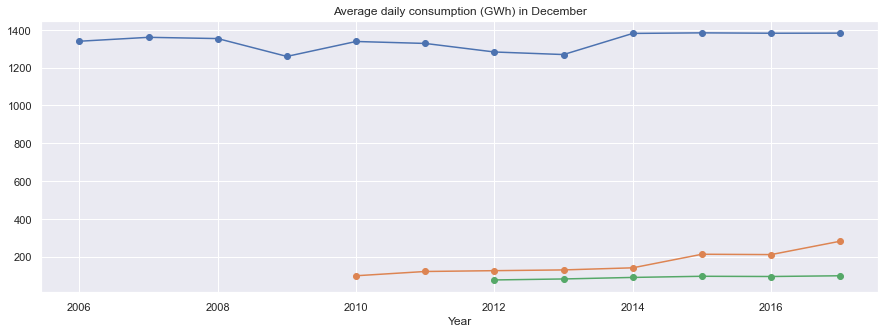

In [40]:
df.groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average yearly consumption (GWh)')
df.groupby('Year', sort=False)['Wind'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average yearly wind energy (GWh)')
df.groupby('Year', sort=False)['Solar'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average yearly solar energy (GWh)')

<AxesSubplot:xlabel='Year', ylabel='Solar'>

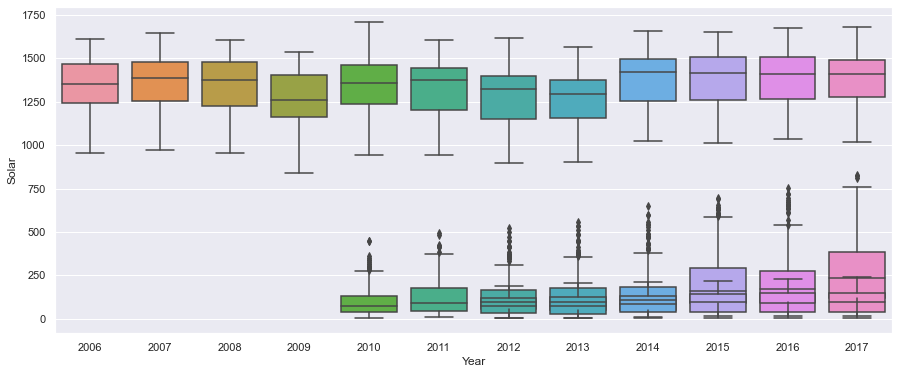

In [41]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Year', y='Consumption')
sns.boxplot(data=df, x='Year', y='Wind')
sns.boxplot(data=df, x='Year', y='Solar')

4) Plottare all'interno dello stesso plot le 7 linee di consumo giornaliero

<AxesSubplot:title={'center':'Average daily consumption (GWh) in December'}, xlabel='Year'>

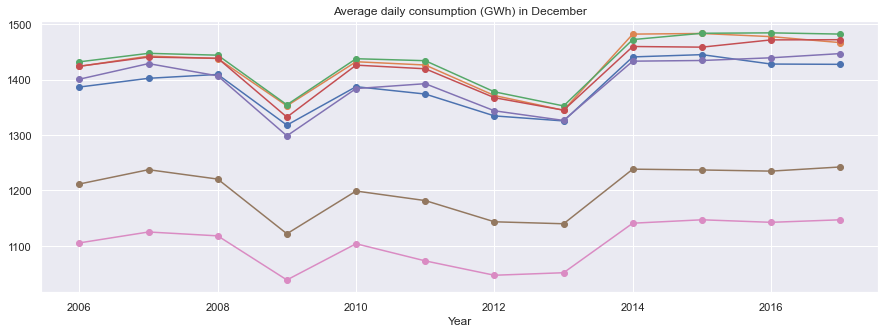

In [48]:
df.loc[df['day_of_week']=="Monday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Monday consumption (GWh)')
df.loc[df['day_of_week']=="Tuesday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Tuesday consumption (GWh)')
df.loc[df['day_of_week']=="Wednesday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Wednesday consumption (GWh)')
df.loc[df['day_of_week']=="Thursday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Thursday consumption (GWh)')
df.loc[df['day_of_week']=="Friday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Friday consumption (GWh)')
df.loc[df['day_of_week']=="Saturday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Saturday consumption (GWh)')
df.loc[df['day_of_week']=="Sunday"].groupby('Year', sort=False)['Consumption'].mean().plot(figsize=(15, 5),
                                                     marker='o',
                                                     title='Average Sunday consumption (GWh)')